In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pickle
import re
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.9 MB/s eta 0:00:00


In [4]:
df= pd.read_csv('fashionnova_reviews.csv')

In [5]:
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [6]:
df.columns

Index(['Reviewer Name', 'Profile Link', 'Country', 'Review Count',
       'Review Date', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
Reviewer Name,63
Profile Link,0
Country,4
Review Count,0
Review Date,0
Rating,0
Review Title,48
Review Text,0
Date of Experience,0


In [8]:
df.shape

(131980, 9)

In [9]:
df[df['Review Title'].isnull()]
df=df.dropna()

In [10]:
df.isnull().sum()

,0
Reviewer Name,0
Profile Link,0
Country,0
Review Count,0
Review Date,0
Rating,0
Review Title,0
Review Text,0
Date of Experience,0


In [11]:
df.drop(columns=['Reviewer Name','Profile Link'] , axis=0,inplace=True)
df.drop(columns=['Review Date'] , axis=0,inplace=True)

In [12]:
df.columns

Index(['Country', 'Review Count', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience'],
      dtype='object')

In [13]:
data = df['Country'].value_counts()

In [14]:
data = data.head(10)

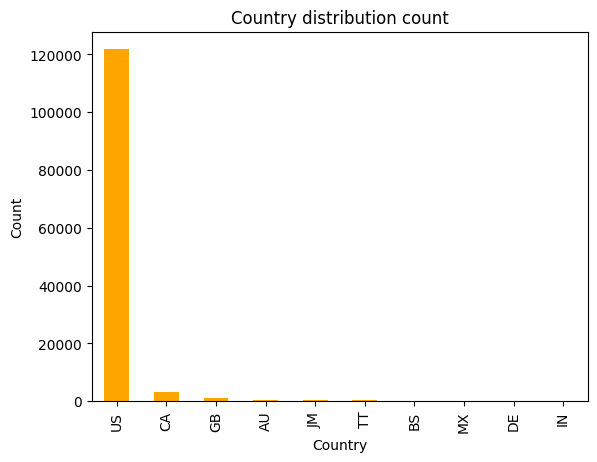

In [15]:
#Bar plot to visualize the total counts of each rating
data.plot.bar(color = '#FFA500')
plt.title('Country distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [16]:
# df['Review Count'].str.split(' ')
df['Review Count']=df['Review Count'].str.extract('(\d+)').astype(int)

In [17]:
data2=df['Review Count'].value_counts()
data2=data2.head(10)

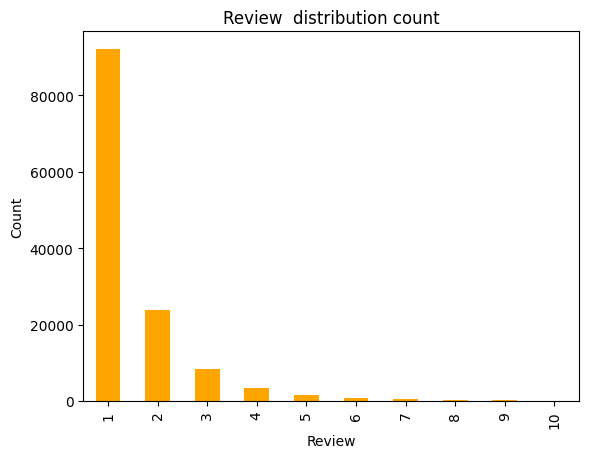

In [18]:
#Bar plot to visualize the total counts of each rating
data2.plot.bar(color = '#FFA500')
plt.title('Review  distribution count')
plt.xlabel('Review')
plt.ylabel('Count')
plt.show()

In [19]:
df.columns

Index(['Country', 'Review Count', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience'],
      dtype='object')

In [20]:
df['Rating'] = df['Rating'].str.extract('(\d+)').astype(int)

In [21]:
df['Rating'].value_counts()

,count
Rating,
5,90830
4,15731
1,12575
3,8734
2,3998


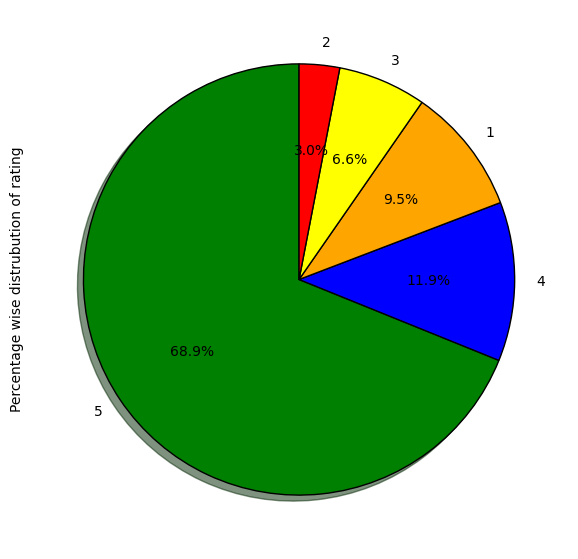

In [22]:
fig = plt.figure(figsize=(7,7))

colors = ( 'green', 'blue','orange','yellow','red')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['Rating'].value_counts()/data.shape[0]

# explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp,  label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [23]:
df['Date of Experience']=pd.to_datetime(df['Date of Experience'])
# df['Date of Experience'].dt.month()



In [24]:
df['Review month']=df['Date of Experience'].dt.month


In [25]:
data3=df['Review month'].value_counts()

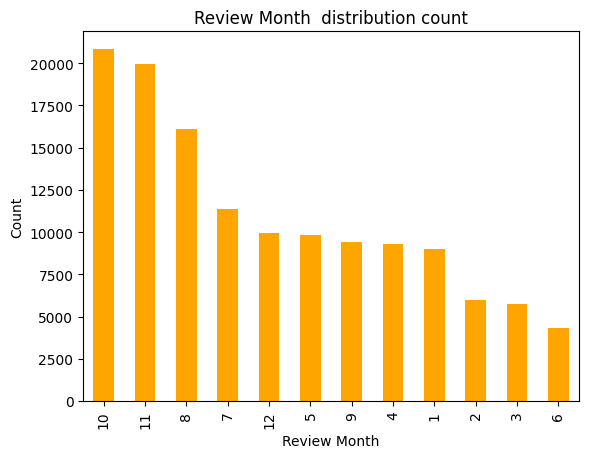

In [26]:
#Bar plot to visualize the total counts of each rating
data3.plot.bar(color = '#FFA500')
plt.title('Review Month  distribution count')
plt.xlabel('Review Month')
plt.ylabel('Count')
plt.show()

In [27]:
df.columns

Index(['Country', 'Review Count', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience', 'Review month'],
      dtype='object')

In [28]:
df['Review year']=df['Date of Experience'].dt.year


In [29]:
data4=df['Review year'].value_counts()

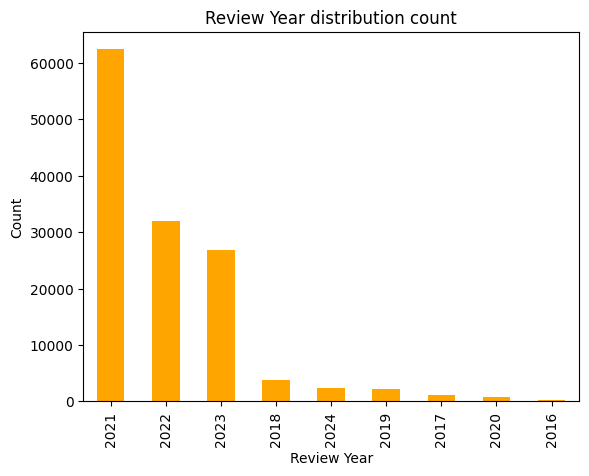

In [30]:
#Bar plot to visualize the total counts of each rating
data4.plot.bar(color = '#FFA500')
plt.title('Review Year distribution count')
plt.xlabel('Review Year')
plt.ylabel('Count')
plt.show()

In [31]:
df['Review Title']

,Review Title
0,I love ordering from fashion nova
1,Top tier content for fashion nova
2,Prices and quality of products are…
3,Great customer service
4,False advertising
...,...
131975,My experience was horrible
131976,amazing
131977,Very helpful
131978,Courteous treatment will make a customer a wal...


In [32]:
df.head()

,Country,Review Count,Rating,Review Title,Review Text,Date of Experience,Review month,Review year
0,US,1,5,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,2024-08-22,8,2024
1,VG,3,5,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,2024-08-18,8,2024
2,US,3,5,Prices and quality of products are…,Prices and quality of products are GREAT Would...,2024-08-21,8,2024
3,US,1,5,Great customer service,Great customer service. I was helped until the...,2024-08-20,8,2024
4,US,5,3,False advertising,Disappointing experience. You don’t live up to...,2024-08-21,8,2024


In [33]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column
df['Review Title length'] = df['Review Title'].apply(len)

[Text(0.5, 1.0, 'Distribution of length of review Title')]

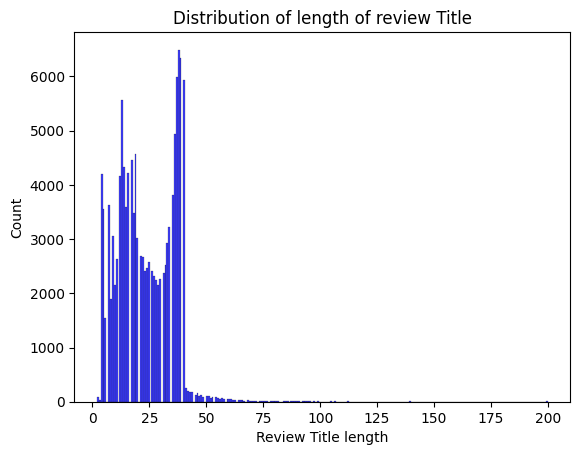

In [34]:
sns.histplot(df['Review Title length'],color='blue').set(title='Distribution of length of review Title')

[Text(0.5, 1.0, 'Distribution of length of review Title When Rating=5')]

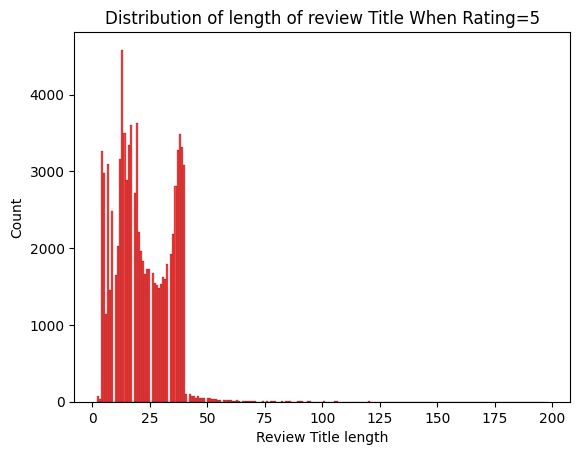

In [35]:
sns.histplot(df[df['Rating']==5]['Review Title length'],color='red').set(title='Distribution of length of review Title When Rating=5')

[Text(0.5, 1.0, 'Distribution of length of review Title When Rating=5')]

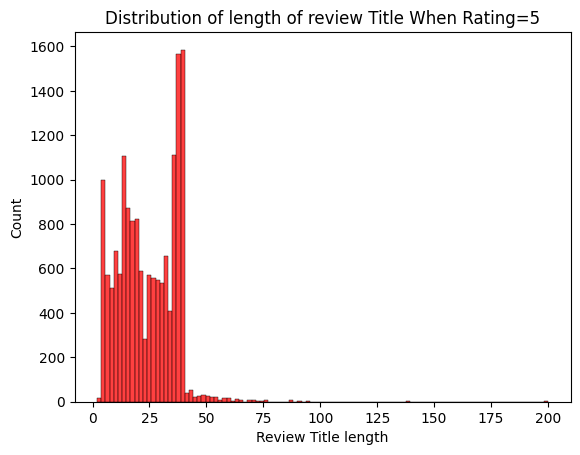

In [36]:
sns.histplot(df[df['Rating']==4]['Review Title length'],color='red').set(title='Distribution of length of review Title When Rating=5')

[Text(0.5, 1.0, 'Distribution of length of review Title When Rating=5')]

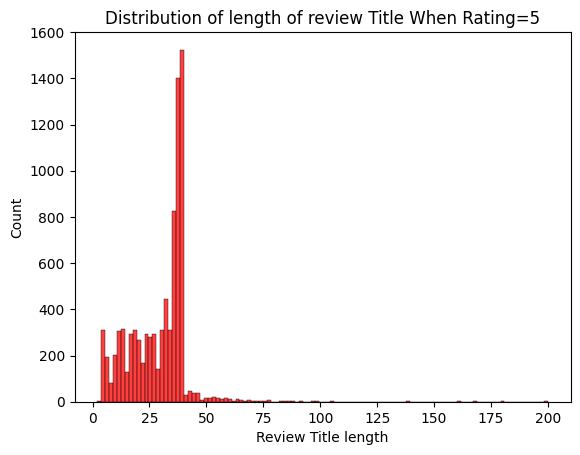

In [37]:
sns.histplot(df[df['Rating']==3]['Review Title length'],color='red').set(title='Distribution of length of review Title When Rating=5')

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['Review Title'])


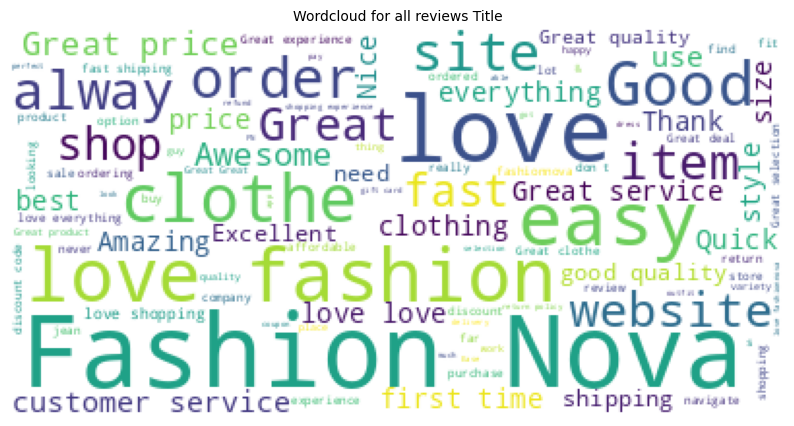

In [39]:
# Combine all reviews
reviews = " ".join([review for review in df['Review Title']
])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews Title', fontsize=10)
plt.axis('off')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['Review Text'])


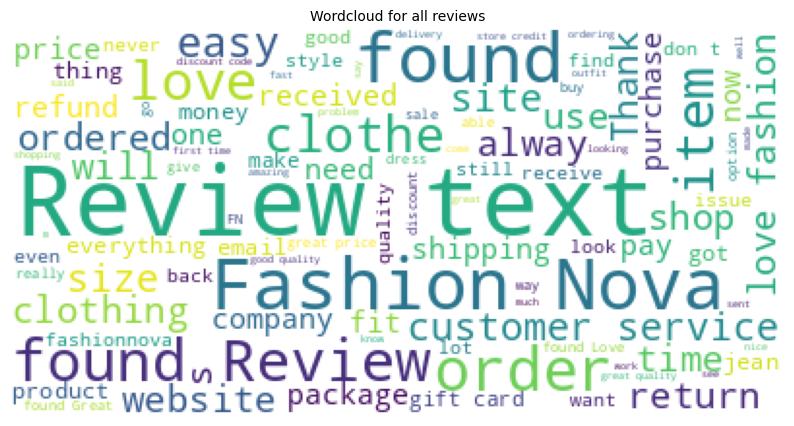

In [41]:
# Combine all reviews
reviews = " ".join([review for review in df['Review Text']
])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [42]:
from collections import Counter

# Combine all reviews for each feedback category and count word frequencies
negative_reviews = Counter(" ".join(df[df['Rating'] <= 2]['Review Text']).lower().split())
positive_reviews = Counter(" ".join(df[df['Rating'] >= 3]['Review Text']).lower().split())

# Convert to sets of words
negative_words = set(negative_reviews)
positive_words = set(positive_reviews)

# Finding words unique to each feedback category
unique_negative_words = negative_words - positive_words
unique_positive_words = positive_words - negative_words

# Join them into strings if necessary
unique_negative = " ".join(unique_negative_words)
unique_positive = " ".join(unique_positive_words)


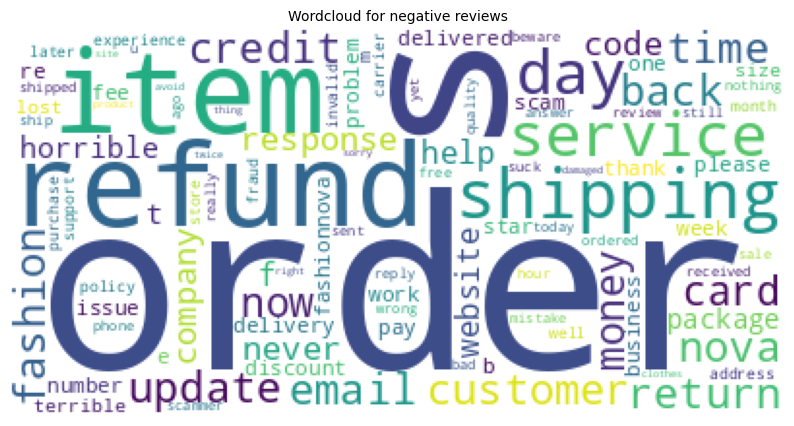

In [43]:
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

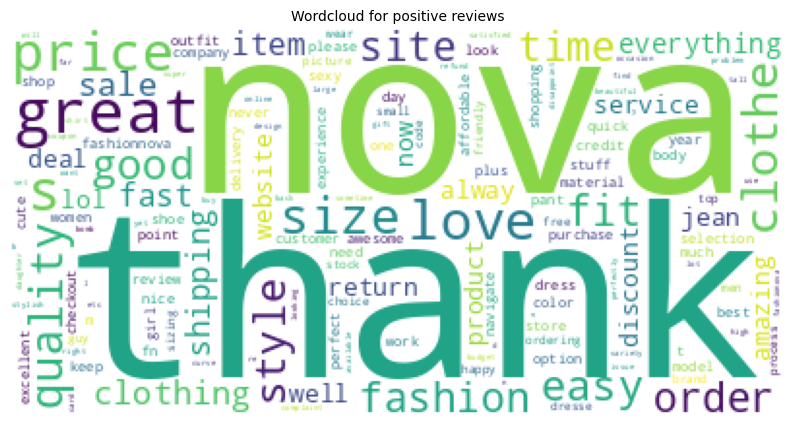

In [44]:
wc = WordCloud(background_color='white', max_words=150)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [45]:
df.columns

Index(['Country', 'Review Count', 'Rating', 'Review Title', 'Review Text',
       'Date of Experience', 'Review month', 'Review year',
       'Review Title length'],
      dtype='object')

In [47]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.6 MB/s eta 0:00:00


In [48]:
from textblob import TextBlob
def classify_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity < 0:
        return -1
    else:
        return 0


In [49]:
df['review_class'] = df['Review Text'].apply(classify_sentiment)



In [50]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['Review Text'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [51]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['review_class'].values

In [52]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [53]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (131868, 2500)
y shape: (131868,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (92307, 2500)
y train: (92307,)
X test: (39561, 2500)
y test: (39561,)


In [55]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [56]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [57]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionaries to store results
results_train = {}
results_test = {}

# K-Fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    # Cross-validation
    cv_results = cross_val_score(clf, X_train_scl, y_train, cv=kfold, scoring='accuracy')
    results_train[name] = {
        'CrossVal_Score_Mean': cv_results.mean(),
        'CrossVal_Error': cv_results.std()
    }

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test_scl) if hasattr(clf, "predict_proba") else None

    # Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted') if y_pred_proba is not None else 'N/A'
    clf_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the evaluation metrics
    results_test[name] = {
        'Accuracy': accuracy,
        'F1_Score': f1,
        'ROC_AUC_Score': roc_auc,
        'Classification_Report': clf_report,
        'Confusion_Matrix': cm
    }

# Print the cross-validation results
for name, result in results_train.items():
    print(f"{name} (Training):")
    print(f"  CrossVal_Score_Mean: {result['CrossVal_Score_Mean']:.4f}")
    print(f"  CrossVal_Error: {result['CrossVal_Error']:.4f}")
    print()

# Print the test results
for name, result in results_test.items():
    print(f"{name} (Test):")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1_Score: {result['F1_Score']:.4f}")
    print(f"  ROC_AUC_Score: {result['ROC_AUC_Score']}")
    print(f"  Classification_Report:\n{result['Classification_Report']}")
    print(f"  Confusion_Matrix:\n{result['Confusion_Matrix']}\n")


Logistic Regression (Training):
  CrossVal_Score_Mean: 0.9080
  CrossVal_Error: 0.0007

Random Forest (Training):
  CrossVal_Score_Mean: 0.9202
  CrossVal_Error: 0.0005

Decision Tree (Training):
  CrossVal_Score_Mean: 0.9227
  CrossVal_Error: 0.0016

Naive Bayes (Training):
  CrossVal_Score_Mean: 0.4645
  CrossVal_Error: 0.0041

Logistic Regression (Test):
  Accuracy: 0.9497
  F1_Score: 0.9487
  ROC_AUC_Score: 0.9744706548820037
  Classification_Report:
              precision    recall  f1-score   support

          -1       0.83      0.71      0.77      3019
           0       0.96      0.97      0.97     14482
           1       0.96      0.97      0.96     22060

    accuracy                           0.95     39561
   macro avg       0.91      0.88      0.90     39561
weighted avg       0.95      0.95      0.95     39561

  Confusion_Matrix:
[[ 2154   237   628]
 [   83 14095   304]
 [  364   374 21322]]

Random Forest (Test):
  Accuracy: 0.9233
  F1_Score: 0.9183
  ROC_AUC_Score